<a href="https://colab.research.google.com/github/stargalax/Japanese-Handwritten-Character-Recognizer-/blob/main/Japanese_Handwritten_Character_Recognizer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%%capture
!pip install easyocr opencv-python-headless


In [4]:
from google.colab import files

# Upload multiple images
uploaded = files.upload()
filenames = list(uploaded.keys())

print(f"✅ Uploaded {len(filenames)} images.")


Saving test3.jpeg to test3.jpeg
Saving test2.jpeg to test2.jpeg
Saving test1.jpeg to test1.jpeg
✅ Uploaded 3 images.


In [6]:
import easyocr
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import logging
import os
import warnings

In [8]:

# Suppress EasyOCR warnings and logs
warnings.filterwarnings("ignore")
logging.getLogger('easyocr').setLevel(logging.ERROR)

# Initialize OCR reader once
print(" Initializing OCR (first time downloads may take ~1 min)...")
reader = easyocr.Reader(['ja'], gpu=False)

 Initializing OCR (first time downloads may take ~1 min)...



 Image 1/3: test3.jpeg


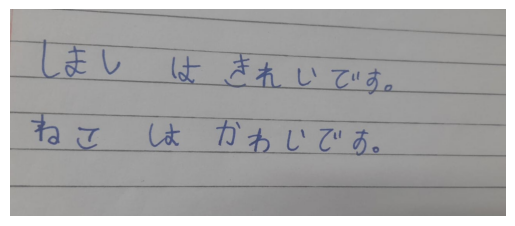

 Recognizing text...
→ しきし (confidence: 0.22)
→ } (confidence: 0.10)
→ タ口しぶむ二 (confidence: 0.00)
→ し (confidence: 0.98)
→ かあしであ (confidence: 0.09)
→ 和こ (confidence: 0.61)

 Image 2/3: test2.jpeg


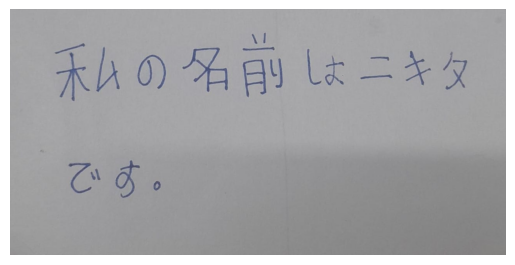

 Recognizing text...
→ 私の名前 しょニキタ (confidence: 0.27)
→ ひす (confidence: 0.99)

 Image 3/3: test1.jpeg


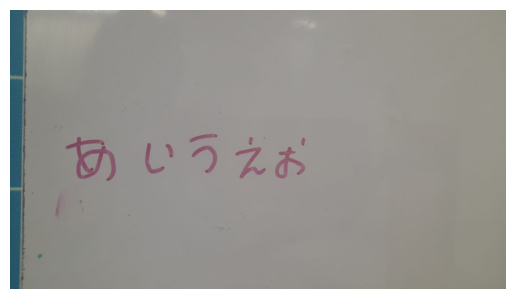

 Recognizing text...
→ 面 いうえお (confidence: 0.35)


In [9]:


# Recognize each image
for i, fname in enumerate(filenames):
    print(f"\n Image {i+1}/{len(filenames)}: {fname}")

    # Load and convert image
    image = cv2.imread(fname)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

    # OCR
    print(" Recognizing text...")
    results = reader.readtext(image)

    if results:
        for (bbox, text, prob) in results:
            print(f"→ {text} (confidence: {prob:.2f})")
    else:
        print(" No text detected.")
